# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Grading Criteria Overview
Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution

## Setup

In [9]:
#!pip install yfinance
#!pip install matplotlib
#!pip install plotly
#!pip install requests
#!pip install bs4
#!pip install html5lib 
#!pip install lxml
#!pip install nbformat
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Make plotly the plotting backend
pd.options.plotting.backend = "plotly"

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [3]:
tesla = yf.Ticker("TSLA")
tesla_yf_data = tesla.history(period="max")
tesla_yf_data.reset_index(inplace=True)
tesla_yf_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [4]:
tesla_ws_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text
tesla_soup = BeautifulSoup(tesla_ws_data, 'html5lib')

tesla_soup_data = []

for table in tesla_soup.find_all('table'):
    if table.find('th') and table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) < 2:  
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.strip()
            
            tesla_soup_data.append({"Date": Date, "Revenue": Revenue})
tesla_ws_df = pd.DataFrame(tesla_soup_data)
tesla_ws_df.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [5]:
gamestop = yf.Ticker("GME")
gamestop_yf_data = gamestop.history(period="max")
gamestop_yf_data.reset_index(inplace=True)
gamestop_yf_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [6]:
gamestop_ws_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text
gamestop_soup = BeautifulSoup(gamestop_ws_data, 'html5lib')

gamestop_soup_data = []

for table in gamestop_soup.find_all('table'):
    if table.find('th') and table.find('th').getText().startswith("GameStop Quarterly Revenue(Millions of US $"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) < 2:  
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.strip()
            
            gamestop_soup_data.append({"Date": Date, "Revenue": Revenue})
gamestop_ws_df = pd.DataFrame(gamestop_soup_data)
tesla_ws_df["Revenue"] = tesla_ws_df["Revenue"].str.replace(',', '').str.replace('$', '')
gamestop_ws_df.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [11]:
tesla_revenue = tesla_ws_df
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], format="%Y-%m-%d")

tesla_revenue.dtypes
tesla_revenue.plot(y="Revenue", x="Date")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Date=%{x}<br>Revenue=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 9, 30, 0, 0),
                          datetime.datetime(2022, 6, 30, 0, 0),
                          datetime.datetime(2022, 3, 31, 0, 0),
                          datetime.datetime(2021, 12, 31, 0, 0),
                          datetime.datetime(2021, 9, 30, 0, 0),
                          datetime.datetime(2021, 6, 30, 0, 0),
                          datetime.datetime(2021, 3, 31, 0, 0),
                          datetime.datetime(2020, 12, 31, 0, 0),
                          datetime.datetime(2020, 9, 30, 0, 0),
                          datetime.datetime(2020, 6, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2019, 12, 31, 0, 0),
                          datetime.datetime(2019, 9, 30, 0, 0),
                          datetime.datetime(2019, 6, 30, 0, 0),
                          datetime.datetime(2019, 3, 31, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0),
                          datetime.datetime(2018, 9, 30, 0, 0),
                          datetime.datetime(2018, 6, 30, 0, 0),
                          datetime.datetime(2018, 3, 31, 0, 0),
                          datetime.datetime(2017, 12, 31, 0, 0),
                          datetime.datetime(2017, 9, 30, 0, 0),
                          datetime.datetime(2017, 6, 30, 0, 0),
                          datetime.datetime(2017, 3, 31, 0, 0),
                          datetime.datetime(2016, 12, 31, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0),
                          datetime.datetime(2016, 6, 30, 0, 0),
                          datetime.datetime(2016, 3, 31, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0),
                          datetime.datetime(2015, 9, 30, 0, 0),
                          datetime.datetime(2015, 6, 30, 0, 0),
                          datetime.datetime(2015, 3, 31, 0, 0),
                          datetime.datetime(2014, 12, 31, 0, 0),
                          datetime.datetime(2014, 9, 30, 0, 0),
                          datetime.datetime(2014, 6, 30, 0, 0),
                          datetime.datetime(2014, 3, 31, 0, 0),
                          datetime.datetime(2013, 12, 31, 0, 0),
                          datetime.datetime(2013, 9, 30, 0, 0),
                          datetime.datetime(2013, 6, 30, 0, 0),
                          datetime.datetime(2013, 3, 31, 0, 0),
                          datetime.datetime(2012, 12, 31, 0, 0),
                          datetime.datetime(2012, 9, 30, 0, 0),
                          datetime.datetime(2012, 6, 30, 0, 0),
                          datetime.datetime(2012, 3, 31, 0, 0),
                          datetime.datetime(2011, 12, 31, 0, 0),
                          datetime.datetime(2011, 9, 30, 0, 0),
                          datetime.datetime(2011, 6, 30, 0, 0),
                          datetime.datetime(2011, 3, 31, 0, 0),
                          datetime.datetime(2010, 12, 31, 0, 0),
                          datetime.datetime(2010, 9, 30, 0, 0),
                          datetime.datetime(2010, 6, 30, 0, 0),
                          datetime.datetime(2010, 3, 31, 0, 0),
                          datetime.datetime(2009, 12, 31, 0, 0),
                          datetime.datetime(2009, 9, 30, 0, 0),
                          datetime.datetime(2009, 6, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2.1454e+04, 1.6934e+04, 1.8756e+04, 1.7719e+04, 1.3757e+04, 1.1958e+04,
      

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

<Axes: xlabel='Date'>

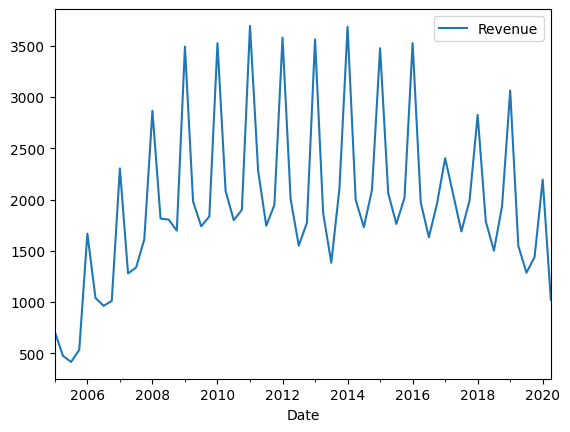

In [8]:
gamestop_revenue = gamestop_ws_df
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"], format="%Y-%m-%d")

gamestop_revenue.dtypes
gamestop_revenue.plot(y="Revenue", x="Date")


## Question 7 - Sharing your Assignment Notebook - 2 Points